<a href="https://colab.research.google.com/github/yukinaga/automl/blob/main/section_1/01_simple_automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなAutoML
ライブラリPyCaretを使い、AutoMLによる機械学習を実装します。  
顧客情報から、その顧客がデフォルト（債務不履行）するかどうかを判定します。  

## PyCaretのインストール
AutoMLをサポートするライブラリ、PyCaretをバージョンを指定してインストールします。

In [1]:
!pip install numpy==1.21.4 numba==0.53
!pip install pycaret
!pip install pandas-profiling==3.1.0

     ---------------------------------------- 14.0/14.0 MB 6.0 MB/s eta 0:00:00


ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39.0

     -------------------------------------- 486.1/486.1 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 80.7/80.7 kB ? eta 0:00:00
     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 81.9/81.9 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.4 MB/s eta 0:00:00
     -------------------------------------- 613.3/613.3 kB 7.7 MB/s eta 0:00:00
     -------------------------------------- 258.3/258.3 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 11.0/11.0 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 21.8/21.8 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 163.8/163.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.2 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.0.1 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.0.1 which is incompatible.
imbalanced-learn 0.12.3 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.


     -------------------------------------- 261.2/261.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 666.2/666.2 kB 4.7 MB/s eta 0:00:00
     -------------------------------------- 423.9/423.9 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 7.7 MB/s eta 0:00:00
     -------------------------------------- 303.1/303.1 kB 9.4 MB/s eta 0:00:00
     -------------------------------------- 102.4/102.4 kB 5.8 MB/s eta 0:00:00
     ------------------------------------- 296.5/296.5 kB 17.9 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 11.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=0e1c9f056acc6758144016d20e9a6147dd59383e7a5aa00a13f129cae618e460
  Stored in directory: c:\users\lgpc\appdata\local\pip\cache\wheels\ea\1c\a8\5cec3479cd45136a7111e2d96aac299

## Google Colabの設定
Google Colab環境でPyCaretのインタラクティブな要素を表示するためには、以下のコードを実行する必要があります。

In [ ]:
# from pycaret.utils import enable_colab

# enable_colab()

## データセットの読み込み
今回は、UCIのDefault of Credit Card Clients Datasetというデータセットを使います。  
このデータセットには、2005年4月から2005年9月までの、台湾のクレジットカード顧客情報が含まれます。  
顧客情報には、デフォルト（債務不履行）したかどうか、人口統計学的要因、信用データ、支払い履歴、および請求書の情報があります。  
サンプル数は24000で特徴の数は25です。  
以下は各特徴の簡単な説明です。  

* ID： 各顧客のID
* LIMIT_BAL: ニュー台湾ドル建ての与信額
* SEX: 性別(1=男性、2=女性)
* EDUCATION： 教育（1＝大学院、2＝大学、3＝高校、4＝その他、5＝不明、6＝不明)
* MARRIAGE: 結婚の有無（1＝既婚、2＝独身、3＝その他)
* AGE: 年齢（単位：歳)
* PAY_0～PAY_6： nヶ月前の返済状況（-1=正規の支払い、1=1ヶ月間の支払い遅延、2=2ヶ月間の支払い遅延、...)
* BILL_AMT1～BILL_AMT6： nヶ月前までの請求明細の金額
* PAY_AMT1 to PAY_AMT6: nヶ月前までの支払額
* default: 債務不履行したかどうか (1=yes, 0=no) 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [2]:
from pycaret.datasets import get_data

dataset = get_data("credit")  # データの取得
dataset.shape  # データの形状

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


(24000, 24)

## 環境の設定
PyCaretの環境を設定します。  
setup関数はPyCaretの環境を初期化しますが、PyCaretの他の関数を実行する前に呼び出す必要があります。  

以下のコードを実行すると、setup関数が実行されてすべての特徴のデータ型が自動的に推定されます。  
この際に、必ずしも正しく推論されるとは限らないことにご注意ください。     
データの型に問題が無ければ、空白を入力することで設定を完了することができます。  

In [3]:
from pycaret.classification import setup

clf = setup(data=dataset, target="default", session_id=123, n_jobs=None)  # 環境の初期化

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


## モデルの比較
様々なモデルを比較して、性能を評価します。  
compare_models関数は、ライブラリ内のすべてのモデルを使って訓練を行い、スコアを評価します。  

In [4]:
from pycaret.classification import compare_models

best_model = compare_models()  # 全てのモデルを訓練し、評価する

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,7.4510
lightgbm,Light Gradient Boosting Machine,0.8203,0.7768,0.3756,0.6664,0.4802,0.3816,0.4047,0.4780
ada,Ada Boost Classifier,0.8186,0.7748,0.3325,0.6850,0.4473,0.3541,0.3874,1.7440
lda,Linear Discriminant Analysis,0.8129,0.7226,0.2719,0.6985,0.3910,0.3049,0.3527,0.1670
rf,Random Forest Classifier,0.8124,0.7645,0.3670,0.6313,0.4637,0.3596,0.3793,5.7940
xgboost,Extreme Gradient Boosting,0.8117,0.7575,0.3724,0.6242,0.4663,0.3608,0.3786,0.6860
et,Extra Trees Classifier,0.8089,0.7516,0.3667,0.6142,0.4590,0.3518,0.3692,2.5300
lr,Logistic Regression,0.8068,0.7140,0.2323,0.6898,0.3458,0.2643,0.3190,1.8740
ridge,Ridge Classifier,0.8014,0.7226,0.1621,0.7296,0.2650,0.2008,0.2782,0.0770
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

わずか1行のコードで、15以上の機械学習モデルを訓練し、評価することができました。  
  
最もスコアの良いモデルの概要を表示します。


In [5]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## モデルの作成
models関数により、全ての使用可能な機械学習モデルを確認することができます。

In [6]:
from pycaret.classification import models

models()  # 機械学習モデルの一覧

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


create_model関数は、「交差検証」を用いて個別のモデルの訓練と評価を行います。  
デフォルトでは、データを10に分割し10通りのテストデータ/訓練データの組み合わせを試します。     
今回は、ツリー状の構造を使ってデータを分類する「決定木」のモデルを作成します。  

In [7]:
from pycaret.classification import create_model

dt = create_model("dt")  # 決定木のモデルを作成

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7214,0.6181,0.4313,0.3837,0.4061,0.2249,0.2256
1,0.7030,0.5977,0.4097,0.3519,0.3786,0.1849,0.1858
2,0.7190,0.6061,0.4043,0.3741,0.3886,0.2066,0.2068
3,0.7423,0.6372,0.4501,0.4217,0.4355,0.2687,0.2689
4,0.7298,0.6093,0.3935,0.3893,0.3914,0.2177,0.2178
5,0.7173,0.5983,0.3827,0.3660,0.3742,0.1917,0.1918
6,0.7167,0.6103,0.4194,0.3750,0.3959,0.2116,0.2122
7,0.7238,0.6091,0.4032,0.3827,0.3927,0.2141,0.2142
8,0.7310,0.6098,0.3844,0.3907,0.3875,0.2152,0.2152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

訓練済みモデルの概要を表示します。  

In [8]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


## ハイパーパラメータの調整
create_model関数は、デフォルトのハイパーパラメータを使ってモデルを訓練します。  
ハイパーパラメータを調整するには、tune_model関数を使用します。  

In [9]:
from pycaret.classification import tune_model

tuned_dt = tune_model(dt)  # ハイパーパラメータの調整

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8196,0.6457,0.3342,0.6889,0.4501,0.3574,0.3909
1,0.8101,0.6348,0.3208,0.6398,0.4273,0.3282,0.3564
2,0.8256,0.6524,0.3423,0.7216,0.4644,0.3756,0.4130
3,0.8268,0.6551,0.3477,0.7247,0.4699,0.3814,0.4182
4,0.8173,0.6316,0.2992,0.7025,0.4197,0.3315,0.3742
5,0.8137,0.6409,0.3315,0.6543,0.4401,0.3424,0.3709
6,0.8286,0.6706,0.3871,0.7059,0.5000,0.4070,0.4338
7,0.8304,0.6641,0.3656,0.7351,0.4883,0.4001,0.4352
8,0.8268,0.6541,0.3441,0.7314,0.4680,0.3802,0.4188


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


ハイパーパラメータを調整済みの、訓練済みモデルの概要を表示します。  

In [10]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


## モデルを評価する
plot_model関数により、様々な側面からモデルを分析することができます。  
15種類のプロットが利用可能です。  

https://pycaret.org/plot-model/

以下のコードは、各特徴の重要度をグラフにプロットします。  

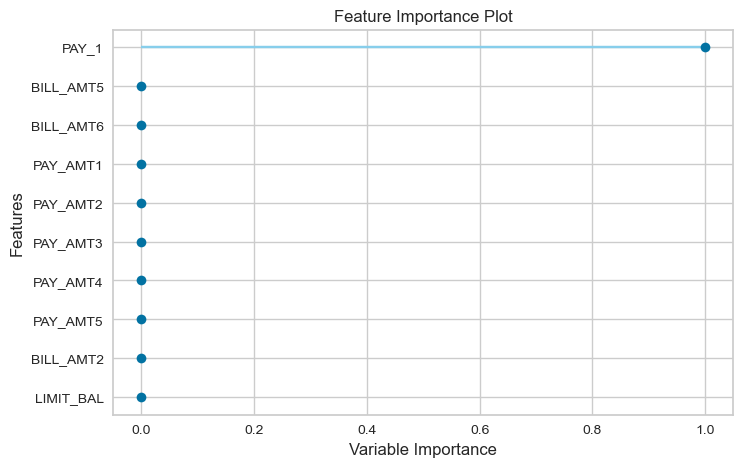

In [11]:
from pycaret.classification import plot_model

plot_model(tuned_dt, plot="feature")  # 各特徴の重要度をプロット